In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



In [2]:
df = pd.read_csv('benin-malanville.csv')

# Display first 5 rows
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
# Data Cleaning

In [3]:
##Check Data Structure

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
## Handling missing values

missing_values = df.isnull().sum()
print(missing_values)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
## Convert all column names to lowercase
df.columns = df.columns.str.lower()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      525600 non-null  object 
 1   ghi            525600 non-null  float64
 2   dni            525600 non-null  float64
 3   dhi            525600 non-null  float64
 4   moda           525600 non-null  float64
 5   modb           525600 non-null  float64
 6   tamb           525600 non-null  float64
 7   rh             525600 non-null  float64
 8   ws             525600 non-null  float64
 9   wsgust         525600 non-null  float64
 10  wsstdev        525600 non-null  float64
 11  wd             525600 non-null  float64
 12  wdstdev        525600 non-null  float64
 13  bp             525600 non-null  int64  
 14  cleaning       525600 non-null  int64  
 15  precipitation  525600 non-null  float64
 16  tmoda          525600 non-null  float64
 17  tmodb          525600 non-nul

In [6]:
## Droping Columns with All Null Values
df = df.drop(columns=['comments'])  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      525600 non-null  object 
 1   ghi            525600 non-null  float64
 2   dni            525600 non-null  float64
 3   dhi            525600 non-null  float64
 4   moda           525600 non-null  float64
 5   modb           525600 non-null  float64
 6   tamb           525600 non-null  float64
 7   rh             525600 non-null  float64
 8   ws             525600 non-null  float64
 9   wsgust         525600 non-null  float64
 10  wsstdev        525600 non-null  float64
 11  wd             525600 non-null  float64
 12  wdstdev        525600 non-null  float64
 13  bp             525600 non-null  int64  
 14  cleaning       525600 non-null  int64  
 15  precipitation  525600 non-null  float64
 16  tmoda          525600 non-null  float64
 17  tmodb          525600 non-nul

In [7]:
## Handle Missing Values
df['ghi'] = df['ghi'].fillna(df['ghi'].mean())


In [8]:
## Handle Outliers (Z-Score Analysis)

from scipy.stats import zscore
df['ghi_zscore'] = zscore(df['ghi'])
df = df[df['ghi_zscore'].abs() < 3]

In [9]:
## Clip Negative Values

df['ghi'] = df['ghi'].clip(lower=0)

In [10]:
## Save Cleaned Data
df.to_csv('cleaned_data_benin-malanville.csv', index=False)

In [7]:
# Visualizing Trends & Relationships

In [11]:
## Summary Statistics
print(df.describe())


                 ghi            dni            dhi           moda  \
count  525511.000000  525511.000000  525511.000000  525511.000000   
mean      241.782816     167.086020     115.292156     236.428465   
std       329.852013     261.614294     158.617632     326.686414   
min         0.000000      -7.800000     -12.600000       0.000000   
25%         0.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.500000       4.500000   
75%       483.000000     313.900000     216.200000     463.400000   
max      1233.000000     952.300000     759.200000    1266.100000   

                modb           tamb             rh             ws  \
count  525511.000000  525511.000000  525511.000000  525511.000000   
mean      228.721658      28.179295      54.485744       2.121010   
std       316.316747       5.924697      28.074795       1.603528   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

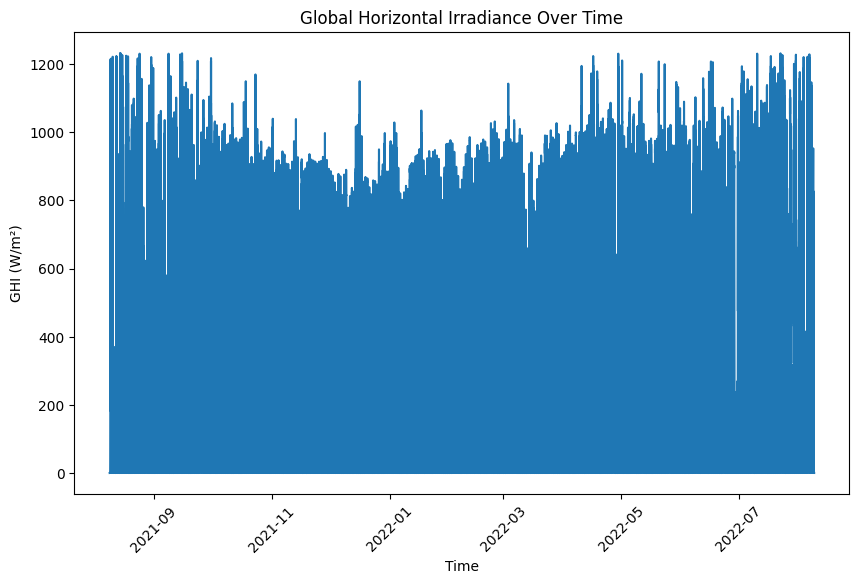

In [12]:
## Time-Series Plot:
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['ghi'])
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.title('Global Horizontal Irradiance Over Time')
plt.xticks(rotation=45)
plt.show()


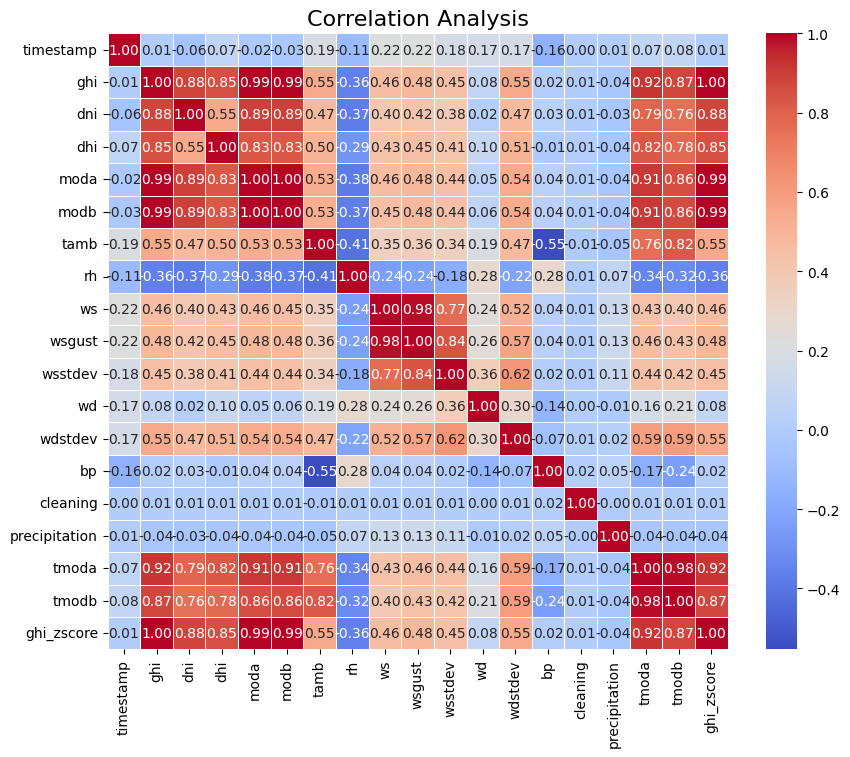

In [13]:
## Correlation Analysis:
corr = df.corr()

plt.figure(figsize=(10, 8))  # Width = 10, Height = 8 (Adjust as needed)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and display the plot
plt.title('Correlation Analysis', fontsize=16)
plt.show()



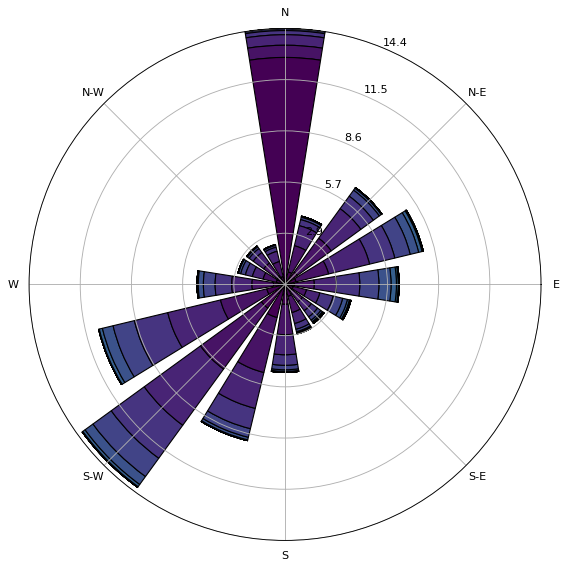

In [14]:
## Wind Rose Analysis

from windrose import WindroseAxes

# Assuming df has 'wd' for wind direction and 'ws' for wind speed
ax = WindroseAxes.from_ax()
ax.bar(df['wd'], df['ws'], bins=np.arange(0, df['ws'].max() + 1, 1), 
       normed=True, edgecolor='k')  # Use 'normed=True' instead of 'norm'
plt.show()


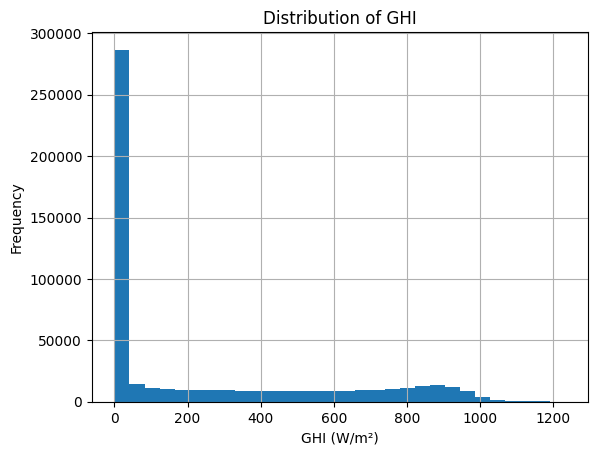

In [15]:
## Histograms:
df['ghi'].hist(bins=30)
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.title('Distribution of GHI')
plt.show()


<Axes: xlabel='ghi', ylabel='tamb'>

c:\Users\ErmiY\Desktop\10_Academy_AI_Mastery\AI_Mastery_Week_0_Challenge\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\ErmiY\Desktop\10_Academy_AI_Mastery\AI_Mastery_Week_0_Challenge\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


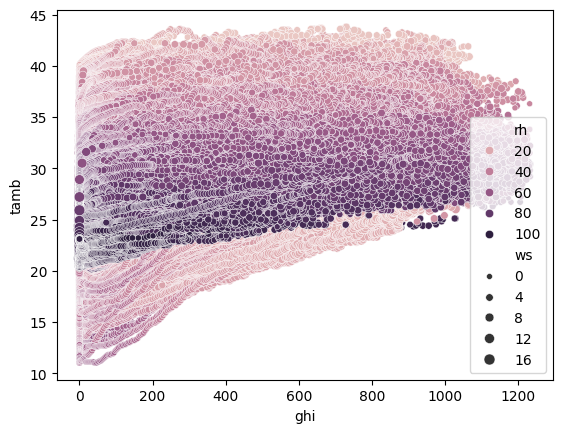

In [16]:
#  Bubble Chart

sns.scatterplot(x='ghi', y='tamb', size='ws', hue='rh', data=df)